In [21]:
#importing
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import keras
import pandas as pd

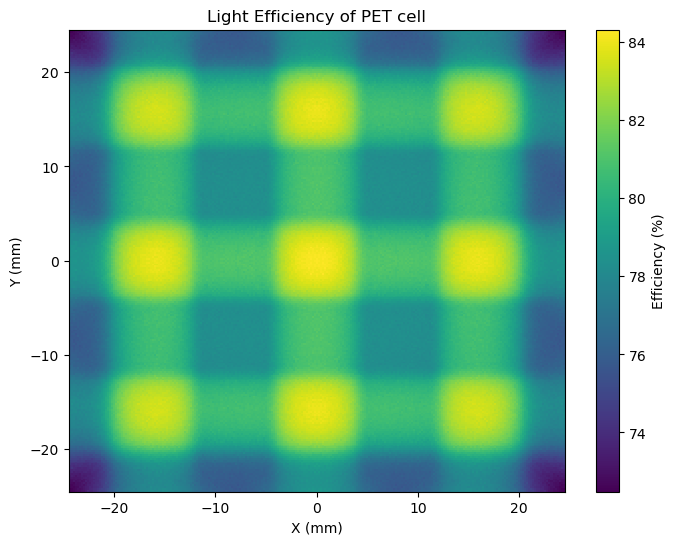

In [22]:
#getting X data
#file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_1mm.csv')
csvreader = csv.reader(file)
#first 13 rows aren't needed
line_count = 0;
original_X = []
for row in csvreader:
  if line_count >= 13:
    original_X.append([int(i) for i in row])
  line_count += 1


#getting Y data
original_y = []
for i in range(-122, 1):
  for j in range(-122, 1):
    original_y.append([i*0.2, j*0.2])

#reconstructing
num_X = np.array(original_X).reshape(123,123,9)
num_y = np.array(original_y).reshape(123,123,2)
bottom_right_X = []
bottom_right_y = []
for i in range(-122, 0):
  for j in range(-122, 1):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    bottom_right_X.append(tmp_X)
    bottom_right_y.append(tmp_y)

bottom_right_X = np.array(bottom_right_X).reshape(122,123,9)
bottom_right_y = np.array(bottom_right_y).reshape(122,123,2)

top_left_X = []
top_left_y = []
for i in range(-122, 1):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[1] = -tmp_y[1]
    for k in range(3):
      tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
    top_left_X.append(tmp_X)
    top_left_y.append(tmp_y)

top_left_X = np.array(top_left_X).reshape(123,122,9)
top_left_y = np.array(top_left_y).reshape(123,122,2)

top_right_X = []
top_right_y = []
for i in range(-122, 0):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(top_left_X[i+122][j+122])
    tmp_y = copy.deepcopy(top_left_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    top_right_X.append(tmp_X)
    top_right_y.append(tmp_y)

top_right_X = np.array(top_right_X).reshape(122,122,9)
top_right_y = np.array(top_right_y).reshape(122,122,2)

#converting to numpy array
X = np.concatenate((num_X.reshape(15129, 9), bottom_right_X.reshape(15006, 9), top_left_X.reshape(15006, 9), top_right_X.reshape(14884, 9)))
y = np.concatenate((num_y.reshape(15129, 2), bottom_right_y.reshape(15006, 2), top_left_y.reshape(15006, 2), top_right_y.reshape(14884, 2)))

xaxis = np.linspace(-24.4, 24.4, 245)
yaxis = np.linspace(-24.4, 24.4, 245)
zaxis = np.zeros((245, 245))

for i in range(len(X)):
    zaxis[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = np.sum(X[i]) / 250000 * 100

plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, zaxis, shading='auto', cmap='viridis')
plt.colorbar(label='Efficiency (%)')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Light Efficiency of PET cell')
plt.savefig("light_efficiency_1mm.png")

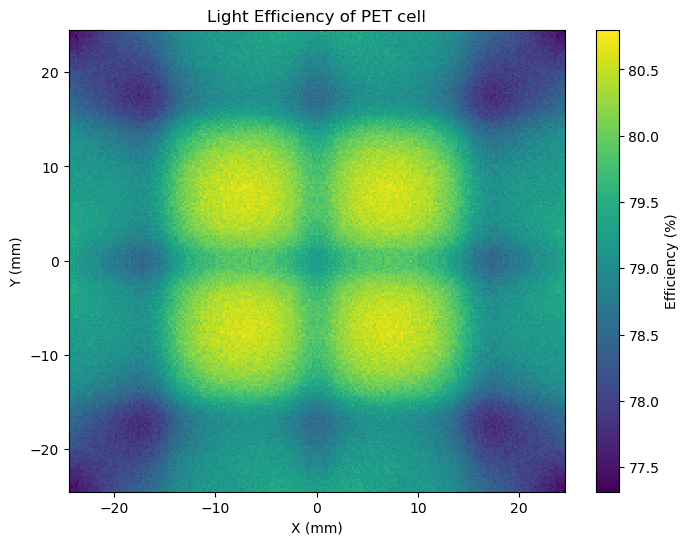

In [23]:
#getting X data
#file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_5mm.csv')
csvreader = csv.reader(file)
#first 13 rows aren't needed
line_count = 0;
original_X = []
for row in csvreader:
  if line_count >= 13:
    original_X.append([int(i) for i in row])
  line_count += 1


#getting Y data
original_y = []
for i in range(-122, 1):
  for j in range(-122, 1):
    original_y.append([i*0.2, j*0.2])

#reconstructing
num_X = np.array(original_X).reshape(123,123,9)
num_y = np.array(original_y).reshape(123,123,2)
bottom_right_X = []
bottom_right_y = []
for i in range(-122, 0):
  for j in range(-122, 1):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    bottom_right_X.append(tmp_X)
    bottom_right_y.append(tmp_y)

bottom_right_X = np.array(bottom_right_X).reshape(122,123,9)
bottom_right_y = np.array(bottom_right_y).reshape(122,123,2)

top_left_X = []
top_left_y = []
for i in range(-122, 1):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[1] = -tmp_y[1]
    for k in range(3):
      tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
    top_left_X.append(tmp_X)
    top_left_y.append(tmp_y)

top_left_X = np.array(top_left_X).reshape(123,122,9)
top_left_y = np.array(top_left_y).reshape(123,122,2)

top_right_X = []
top_right_y = []
for i in range(-122, 0):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(top_left_X[i+122][j+122])
    tmp_y = copy.deepcopy(top_left_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    top_right_X.append(tmp_X)
    top_right_y.append(tmp_y)

top_right_X = np.array(top_right_X).reshape(122,122,9)
top_right_y = np.array(top_right_y).reshape(122,122,2)

#converting to numpy array
X = np.concatenate((num_X.reshape(15129, 9), bottom_right_X.reshape(15006, 9), top_left_X.reshape(15006, 9), top_right_X.reshape(14884, 9)))
y = np.concatenate((num_y.reshape(15129, 2), bottom_right_y.reshape(15006, 2), top_left_y.reshape(15006, 2), top_right_y.reshape(14884, 2)))

xaxis = np.linspace(-24.4, 24.4, 245)
yaxis = np.linspace(-24.4, 24.4, 245)
zaxis = np.zeros((245, 245))

for i in range(len(X)):
    zaxis[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = np.sum(X[i]) / 250000 * 100

plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, zaxis, shading='auto', cmap='viridis')
plt.colorbar(label='Efficiency (%)')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Light Efficiency of PET cell')
plt.savefig("light_efficiency_5mm.png")

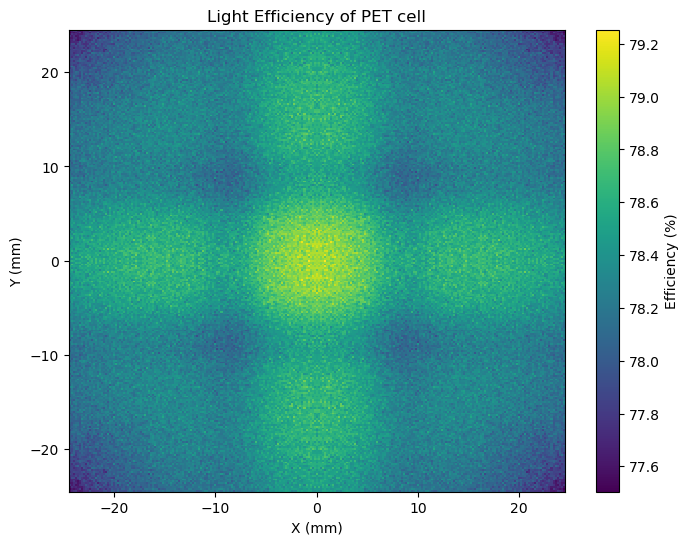

In [24]:
#getting X data
#file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_15mm.csv')
csvreader = csv.reader(file)
#first 13 rows aren't needed
line_count = 0;
original_X = []
for row in csvreader:
  if line_count >= 13:
    original_X.append([int(i) for i in row])
  line_count += 1


#getting Y data
original_y = []
for i in range(-122, 1):
  for j in range(-122, 1):
    original_y.append([i*0.2, j*0.2])

#reconstructing
num_X = np.array(original_X).reshape(123,123,9)
num_y = np.array(original_y).reshape(123,123,2)
bottom_right_X = []
bottom_right_y = []
for i in range(-122, 0):
  for j in range(-122, 1):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    bottom_right_X.append(tmp_X)
    bottom_right_y.append(tmp_y)

bottom_right_X = np.array(bottom_right_X).reshape(122,123,9)
bottom_right_y = np.array(bottom_right_y).reshape(122,123,2)

top_left_X = []
top_left_y = []
for i in range(-122, 1):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[1] = -tmp_y[1]
    for k in range(3):
      tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
    top_left_X.append(tmp_X)
    top_left_y.append(tmp_y)

top_left_X = np.array(top_left_X).reshape(123,122,9)
top_left_y = np.array(top_left_y).reshape(123,122,2)

top_right_X = []
top_right_y = []
for i in range(-122, 0):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(top_left_X[i+122][j+122])
    tmp_y = copy.deepcopy(top_left_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    top_right_X.append(tmp_X)
    top_right_y.append(tmp_y)

top_right_X = np.array(top_right_X).reshape(122,122,9)
top_right_y = np.array(top_right_y).reshape(122,122,2)

#converting to numpy array
X = np.concatenate((num_X.reshape(15129, 9), bottom_right_X.reshape(15006, 9), top_left_X.reshape(15006, 9), top_right_X.reshape(14884, 9)))
y = np.concatenate((num_y.reshape(15129, 2), bottom_right_y.reshape(15006, 2), top_left_y.reshape(15006, 2), top_right_y.reshape(14884, 2)))

xaxis = np.linspace(-24.4, 24.4, 245)
yaxis = np.linspace(-24.4, 24.4, 245)
zaxis = np.zeros((245, 245))

for i in range(len(X)):
    zaxis[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = np.sum(X[i]) / 250000 * 100

plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, zaxis, shading='auto', cmap='viridis')
plt.colorbar(label='Efficiency (%)')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Light Efficiency of PET cell')
plt.savefig("light_efficiency_15mm.png")

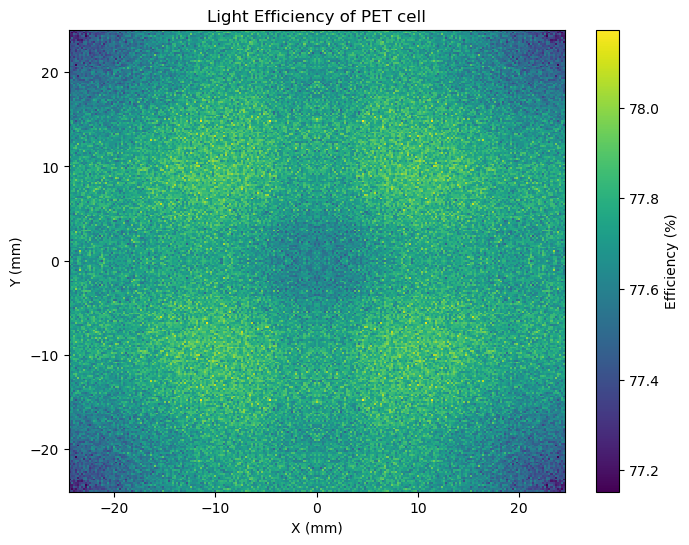

In [25]:
#getting X data
#file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_25mm.csv')
csvreader = csv.reader(file)
#first 13 rows aren't needed
line_count = 0;
original_X = []
for row in csvreader:
  if line_count >= 13:
    original_X.append([int(i) for i in row])
  line_count += 1


#getting Y data
original_y = []
for i in range(-122, 1):
  for j in range(-122, 1):
    original_y.append([i*0.2, j*0.2])

#reconstructing
num_X = np.array(original_X).reshape(123,123,9)
num_y = np.array(original_y).reshape(123,123,2)
bottom_right_X = []
bottom_right_y = []
for i in range(-122, 0):
  for j in range(-122, 1):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    bottom_right_X.append(tmp_X)
    bottom_right_y.append(tmp_y)

bottom_right_X = np.array(bottom_right_X).reshape(122,123,9)
bottom_right_y = np.array(bottom_right_y).reshape(122,123,2)

top_left_X = []
top_left_y = []
for i in range(-122, 1):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[1] = -tmp_y[1]
    for k in range(3):
      tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
    top_left_X.append(tmp_X)
    top_left_y.append(tmp_y)

top_left_X = np.array(top_left_X).reshape(123,122,9)
top_left_y = np.array(top_left_y).reshape(123,122,2)

top_right_X = []
top_right_y = []
for i in range(-122, 0):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(top_left_X[i+122][j+122])
    tmp_y = copy.deepcopy(top_left_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    top_right_X.append(tmp_X)
    top_right_y.append(tmp_y)

top_right_X = np.array(top_right_X).reshape(122,122,9)
top_right_y = np.array(top_right_y).reshape(122,122,2)

#converting to numpy array
X = np.concatenate((num_X.reshape(15129, 9), bottom_right_X.reshape(15006, 9), top_left_X.reshape(15006, 9), top_right_X.reshape(14884, 9)))
y = np.concatenate((num_y.reshape(15129, 2), bottom_right_y.reshape(15006, 2), top_left_y.reshape(15006, 2), top_right_y.reshape(14884, 2)))

xaxis = np.linspace(-24.4, 24.4, 245)
yaxis = np.linspace(-24.4, 24.4, 245)
zaxis = np.zeros((245, 245))

for i in range(len(X)):
    zaxis[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = np.sum(X[i]) / 250000 * 100

plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, zaxis, shading='auto', cmap='viridis')
plt.colorbar(label='Efficiency (%)')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Light Efficiency of PET cell')
plt.savefig("light_efficiency_25mm.png")

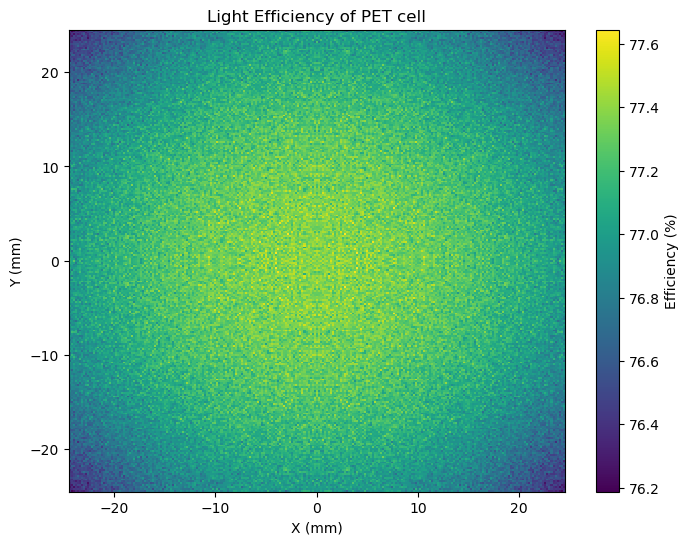

In [26]:
#getting X data
#file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_45mm.csv')
csvreader = csv.reader(file)
#first 13 rows aren't needed
line_count = 0;
original_X = []
for row in csvreader:
  if line_count >= 13:
    original_X.append([int(i) for i in row])
  line_count += 1


#getting Y data
original_y = []
for i in range(-122, 1):
  for j in range(-122, 1):
    original_y.append([i*0.2, j*0.2])

#reconstructing
num_X = np.array(original_X).reshape(123,123,9)
num_y = np.array(original_y).reshape(123,123,2)
bottom_right_X = []
bottom_right_y = []
for i in range(-122, 0):
  for j in range(-122, 1):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    bottom_right_X.append(tmp_X)
    bottom_right_y.append(tmp_y)

bottom_right_X = np.array(bottom_right_X).reshape(122,123,9)
bottom_right_y = np.array(bottom_right_y).reshape(122,123,2)

top_left_X = []
top_left_y = []
for i in range(-122, 1):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(num_X[i+122][j+122])
    tmp_y = copy.deepcopy(num_y[i+122][j+122])
    #mirroring
    tmp_y[1] = -tmp_y[1]
    for k in range(3):
      tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
    top_left_X.append(tmp_X)
    top_left_y.append(tmp_y)

top_left_X = np.array(top_left_X).reshape(123,122,9)
top_left_y = np.array(top_left_y).reshape(123,122,2)

top_right_X = []
top_right_y = []
for i in range(-122, 0):
  for j in range(-122, 0):
    tmp_X = copy.deepcopy(top_left_X[i+122][j+122])
    tmp_y = copy.deepcopy(top_left_y[i+122][j+122])
    #mirroring
    tmp_y[0] = -tmp_y[0]
    for k in range(3):
      tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
    top_right_X.append(tmp_X)
    top_right_y.append(tmp_y)

top_right_X = np.array(top_right_X).reshape(122,122,9)
top_right_y = np.array(top_right_y).reshape(122,122,2)

#converting to numpy array
X = np.concatenate((num_X.reshape(15129, 9), bottom_right_X.reshape(15006, 9), top_left_X.reshape(15006, 9), top_right_X.reshape(14884, 9)))
y = np.concatenate((num_y.reshape(15129, 2), bottom_right_y.reshape(15006, 2), top_left_y.reshape(15006, 2), top_right_y.reshape(14884, 2)))

xaxis = np.linspace(-24.4, 24.4, 245)
yaxis = np.linspace(-24.4, 24.4, 245)
zaxis = np.zeros((245, 245))

for i in range(len(X)):
    zaxis[122+round(y[i][0]*5)][122-round(y[i][1]*5)] = np.sum(X[i]) / 250000 * 100

plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, zaxis, shading='auto', cmap='viridis')
plt.colorbar(label='Efficiency (%)')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Light Efficiency of PET cell')
plt.savefig("light_efficiency_45mm.png")